<a href="/assets/tutorial04_code.ipynb" class="link-button">Download</a>
<a href="https://colab.research.google.com/github/technion046195/technion046195/blob/master/content/tutorial04/code.ipynb" target="_blank">
<img src="../assets/colab-badge.svg" style="display:inline"/>
</a>

<center><h1>
תרגול 4 - Overfitting and generalization
</h1></center>

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex, Markdown

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

## Ex. 4.3

In [ ]:
x = np.array([6, 1, 4, 5])
y = np.array([4, 2, 5, 2])

x_grid = np.arange(0, 8, 0.1)

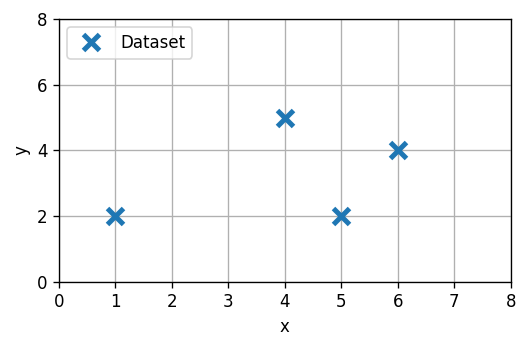

In [ ]:
## Ploting
fig, ax = plt.subplots(figsize=(4.5, 3))
ax.plot(x, y, 'x', ms=10, mew=3, label=f'Dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='upper left')
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
plt.tight_layout()
fig.savefig('./output/ex_4_3_dataset.png')

### Section 1

In [ ]:
x_train = x[:3]
y_train = y[:3]

x_test = x[3:]
y_test = y[3:]

In [ ]:
## Defining augmentation
aug_func = lambda x, k: x[:, None] ** np.arange(0, k + 1)[None, :]

K=0: $\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{3.0}$[11.]=[3.66666667], Test score = 1.667

K=1: $\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{38.0}$[77. 17.]=[2.02631579 0.44736842], Test score = 2.263

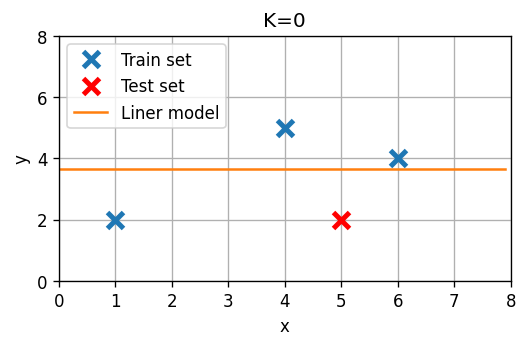

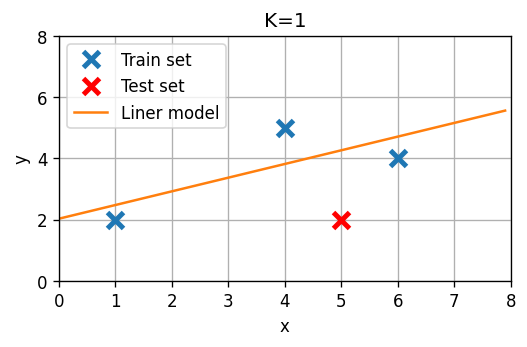

In [ ]:
for k in np.arange(2):
    ## Augment the dataset
    x_aug = aug_func(x_train, k)

    ## Calcualting theta
    theta = np.linalg.inv(x_aug.T @ x_aug) @ (x_aug.T @ y_train)
    denom = np.linalg.det(x_aug.T @ x_aug).round()

    ## Defineing the predictor
    h1 = lambda x: aug_func(x, k) @ theta

    ## Ploting
    fig, ax = plt.subplots(figsize=(4.5, 3))
    ax.plot(x_train, y_train, 'x', ms=10, mew=3, label=f'Train set')
    ax.plot(x_test, y_test, 'xr', ms=10, mew=3, label=f'Test set')
    ax.plot(x_grid, h1(x_grid), label=f'Liner model')
    ax.set_title(f'K={k}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='upper left')
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    plt.tight_layout()
    fig.savefig(f'./output/ex_4_3_1_order_{k}.png')

    ## Test cost
    test_score = ((h1(x_test) - y_test) ** 2).mean() ** 0.5
    display(Markdown(f'K={k}: ' 
                     + r'$\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{' + f'{denom}}}${theta * denom}={theta}, '
                     + f'Test score = {test_score:.3f}'
                     ))


## Section 3

K=0: $\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{2.0}$[6.]=[3.], Validataion score = 2.000

K=1: $\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{25.0}$[40. 10.]=[1.6 0.4], Validataion score = 1.800

#### Best K

best K=1

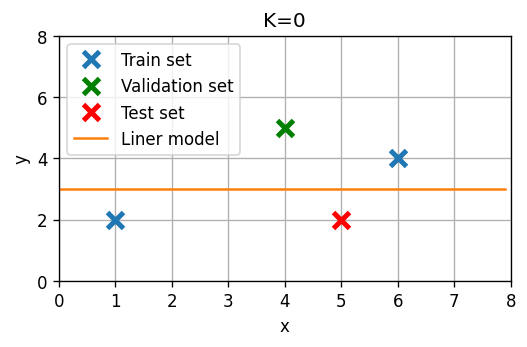

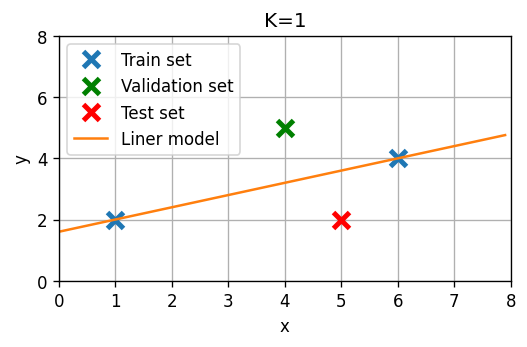

In [ ]:
x_train2 = x_train[:2]
y_train2 = y_train[:2]

x_val = x_train[2:]
y_val = y_train[2:]

val_scores = {}
for k in np.arange(2):
    ## Augment the dataset
    x_aug = aug_func(x_train2, k)

    ## Calcualting theta
    theta = np.linalg.inv(x_aug.T @ x_aug) @ (x_aug.T @ y_train2)
    denom = np.linalg.det(x_aug.T @ x_aug).round()

    ## Defineing the predictor
    h1 = lambda x: aug_func(x, k) @ theta

    ## Ploting
    fig, ax = plt.subplots(figsize=(4.5, 3))
    ax.plot(x_train2, y_train2, 'x', ms=10, mew=3, label=f'Train set')
    ax.plot(x_val, y_val, 'xg', ms=10, mew=3, label=f'Validation set')
    ax.plot(x_test, y_test, 'xr', ms=10, mew=3, label=f'Test set')
    ax.plot(x_grid, h1(x_grid), label=f'Liner model')
    ax.set_title(f'K={k}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='upper left')
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    plt.tight_layout()
    fig.savefig(f'./output/ex_4_3_3_order_{k}.png')
    
    ## Validataion score
    val_score = ((h1(x_val) - y_val) ** 2).mean() ** 0.5
    val_scores[k] = val_score
    display(Markdown(f'K={k}: ' 
                     + r'$\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{' + f'{denom}}}${theta * denom}={theta}, '
                     + f'Validataion score = {val_score:.3f}'
                     ))

display(Markdown(f'#### Best K'))
best_k = min(val_scores, key=val_scores.get)
display(Markdown(f'best K={best_k}'))

## Section 4

K=0: $\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{2.0}$[7.]=[3.5], Validataion score = 0.500

K=0: $\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{2.0}$[9.]=[4.5], Validataion score = 2.500

K=0: $\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{2.0}$[6.]=[3.], Validataion score = 2.000

-> K=0: Mean validataion score = 1.667

K=1: $\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{9.0}$[9. 9.]=[1. 1.], Validataion score = 3.000

K=1: $\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{4.0}$[28. -2.]=[ 7.  -0.5], Validataion score = 4.500

K=1: $\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{25.0}$[40. 10.]=[1.6 0.4], Validataion score = 1.800

-> K=1: Mean validataion score = 3.100

#### Best K

best K=1

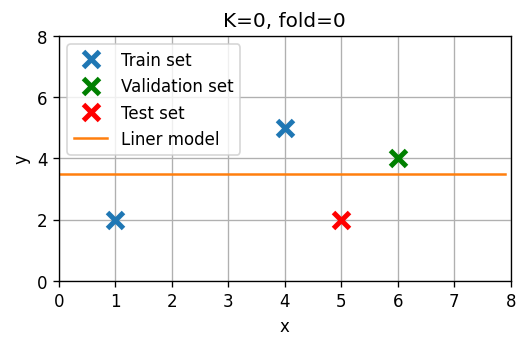

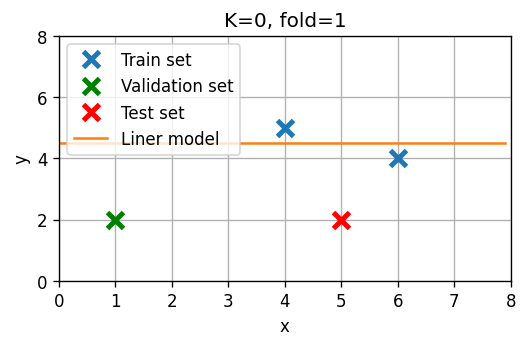

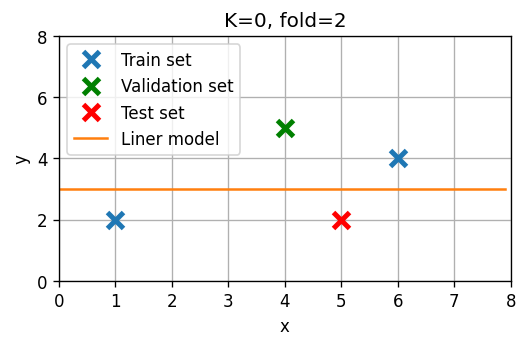

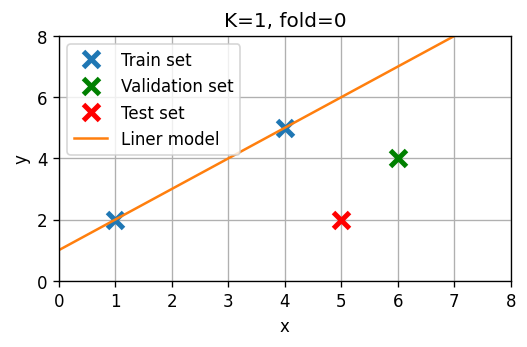

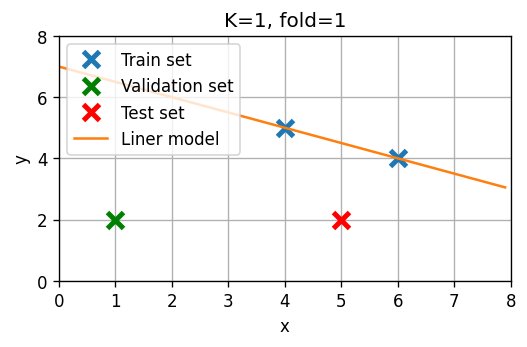

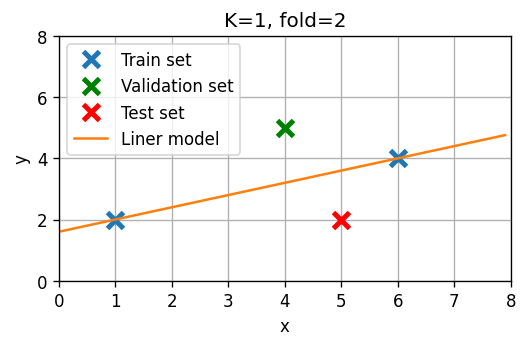

In [ ]:
val_scores = {}
for k in np.arange(2):
    val_scores_cross = []
    for i in range(x_train.shape[0]):
        x_train2 = np.concatenate((x_train[:i], x_train[(i+1):]), axis=0)
        y_train2 = np.concatenate((y_train[:i], y_train[(i+1):]), axis=0)

        x_val = x[i:(i+1)]
        y_val = y[i:(i+1)]

        ## Augment the dataset
        x_aug = aug_func(x_train2, k)

        ## Calcualting theta
        theta = np.linalg.inv(x_aug.T @ x_aug) @ (x_aug.T @ y_train2)
        denom = np.linalg.det(x_aug.T @ x_aug).round()

        ## Defineing the predictor
        h1 = lambda x: aug_func(x, k) @ theta

        ## Ploting
        fig, ax = plt.subplots(figsize=(4.5, 3))
        ax.plot(x_train2, y_train2, 'x', ms=10, mew=3, label=f'Train set')
        ax.plot(x_val, y_val, 'xg', ms=10, mew=3, label=f'Validation set')
        ax.plot(x_test, y_test, 'xr', ms=10, mew=3, label=f'Test set')
        ax.plot(x_grid, h1(x_grid), label=f'Liner model')
        ax.set_title(f'K={k}, fold={i}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend(loc='upper left')
        ax.set_xlim(0, 8)
        ax.set_ylim(0, 8)
        plt.tight_layout()
        fig.savefig(f'./output/ex_4_3_4_order_{k}_fold_{i}.png')

        ## Validataion score
        val_score = ((h1(x_val) - y_val) ** 2).mean() ** 0.5
        display(Markdown(f'K={k}: ' 
                         + r'$\boldsymbol{\theta}^*_{\mathcal{D}}=\frac{1}{' + f'{denom}}}${theta * denom}={theta}, '
                         + f'Validataion score = {val_score:.3f}'
                         ))
        val_scores_cross.append(val_score)
    val_scores[k] = np.mean(val_scores_cross)
    display(Markdown(f'-> K={k}: Mean validataion score = {val_scores[k]:.3f}'))
display(Markdown(f'#### Best K'))
best_k = max(val_scores, key=val_scores.get)
display(Markdown(f'best K={k}'))